In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dd = pd.read_csv("C:\\Users\\ksmen\\Downloads\\Donors_Data.csv")


In [2]:
#Upload file to be analyzed
def upload_file(file_path):
    df = pd.read_csv(file_path)
    return df

#Data Exploration
def explore_df(data_frame):
    #Show first 10 rows in data frame
    print("First 10 Rows:")
    print(data_frame.head(10))
    print("\n")
    
    #Show data types of the columns
    print("Data types of columns:")
    print(data_frame.dtypes)
    print("\n")
    
    #Descriptive statistical summary
    print("Descriptive Statistical Summary:")
    print(data_frame.describe())
    print("\n")
    
#Clean Data Frame
def clean_df(data_frame):
    cdf = df.drop_duplicates(inplace=True)
    cdf = df.dropna()
    return cdf

#Drop columns 
def drop_columns(data_frame, columns):
    data_frame.drop(columns=columns, inplace=True)
    return data_frame

#Rename columns
def rename_columns(data_frame, column_name, new_column_name):
    data_frame.rename(columns={column_name: new_column_name}, inplace=True)
    return data_frame

#Analysis

def round_avg_donation(data_frame):
    data_frame['Average_Donation_Amount'] = data_frame['Average_Donation_Amount'].apply(lambda x: round(x, 2))
    return data_frame

def wealth_vs_donation(data_frame):
    wealth_vs_donation = data_frame.groupby('Wealth_Rating')['Average_Donation_Amount'].mean().reset_index()
    return wealth_vs_donation

def income_vs_wealth(data_frame):
    income_vs_wealth = data_frame.groupby(['Gender', 'Wealth_Rating'])['Average_Income'].mean().reset_index()
    return income_vs_wealth

def donation_vs_promotion(data_frame):
    donation_vs_promotion = data_frame[data_frame['Donor_Status'] == 1].groupby('Number_of_Promotions')['Total_Donation_Amount'].sum().reset_index()
    return donation_vs_promotion

def overall_promotion_comparison(data_frame):
    overall_promotion_comparison = data_frame.groupby('Number_of_Promotions').agg({
        'Total_Donation_Amount': 'sum',
        'Average_Donation_Amount': 'mean',
        'Last_Donation(M)': 'mean',
        'Average_Income': 'mean',
        'Donation_Amount': 'mean',
        'Time_Between_Donation': 'mean',
        'Max_Donation_Amount': 'mean'
    }).reset_index()
    return overall_promotion_comparison


#Visualization
def visualization(data_frame, x_column, y_column, hue_column = None, plot_type = None , title = None, x_label = None, y_label = None, legend_title = None):
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'bar':
        sns.barplot(data = data_frame, x = x_column, y = y_column, hue = hue_column)
    elif plot_type == 'line':
        sns.lineplot(data = data_frame, x = x_column, y = y_column)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if hue_column:
        plt.legend(title=legend_title)
    
    plt.show()

In [3]:
file = r"C:\\Users\\ksmen\\Downloads\\Donors_Data.csv"
df = upload_file(file)
df

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3116,23256,0,0,0,1,1,1,4,0,...,11,23,30.0,16.0,4.0,29,5,7.500000,0,0.0
3116,3117,23258,0,1,0,0,0,1,2,0,...,0,29,53.0,30.0,30.0,37,9,26.500000,1,40.0
3117,3118,23261,0,0,0,1,1,1,3,0,...,6,79,212.0,20.0,20.0,36,3,11.157895,0,0.0
3118,3119,23265,0,0,0,1,1,1,7,1,...,6,27,60.0,20.0,20.0,31,9,20.000000,0,0.0


In [4]:
explore_df(df)

First 10 Rows:
   Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5   
0       1       17             0             1             0             0  \
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   
5       6       53             0             1             0             0   
6       7       58             0             0             0             1   
7       8       61             1             0             0             0   
8       9       71             0             0             1             0   
9      10       87             1             0             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  IC15  NUMPROM   
0                1        1       5             1  ..

In [5]:
cdf = clean_df(df)
cdf

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3116,23256,0,0,0,1,1,1,4,0,...,11,23,30.0,16.0,4.0,29,5,7.500000,0,0.0
3116,3117,23258,0,1,0,0,0,1,2,0,...,0,29,53.0,30.0,30.0,37,9,26.500000,1,40.0
3117,3118,23261,0,0,0,1,1,1,3,0,...,6,79,212.0,20.0,20.0,36,3,11.157895,0,0.0
3118,3119,23265,0,0,0,1,1,1,7,1,...,6,27,60.0,20.0,20.0,31,9,20.000000,0,0.0


In [6]:
columns = ["Row Id", "Row Id.","zipconvert_2","zipconvert_3","zipconvert_4","zipconvert_5"]
cdf= drop_columns(cdf, columns)
cdf

,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,1,5,1,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,1,1,1,0,7,698,422,463,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,0,2,5,1,8,828,358,376,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,1,1,3,0,4,1471,484,546,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,1,1,4,0,8,547,386,432,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,1,1,4,0,8,697,337,372,11,23,30.0,16.0,4.0,29,5,7.500000,0,0.0
3116,0,1,2,0,8,590,319,400,0,29,53.0,30.0,30.0,37,9,26.500000,1,40.0
3117,1,1,3,0,7,3129,547,580,6,79,212.0,20.0,20.0,36,3,11.157895,0,0.0
3118,1,1,7,1,8,1345,514,525,6,27,60.0,20.0,20.0,31,9,20.000000,0,0.0


In [7]:
# Created a dictionary mapping the orinignal column names to new meaninful column names
cn = {
    'homeowner dummy': 'Homeowner',
    'NUMCHLD': 'Number_of_Children',
    'INCOME': 'Income',
    'gender dummy': 'Gender',
    'WEALTH': 'Wealth_Rating',
    'HV': 'Home_Value',
    'Icmed': 'Median_Income',
    'Icavg': 'Average_Income',
    'IC15': '<=15K_Income',
    'NUMPROM': 'Number_of_Promotions',
    'RAMNTALL': 'Total_Donation_Amount',
    'MAXRAMNT': 'Max_Donation_Amount',
    'LASTGIFT': 'Last_Donation_Amount',
    'totalmonths': 'Last_Donation(M)',
    'TIMELAG': 'Time_Between_Donation',
    'AVGGIFT': 'Average_Donation_Amount',
    'TARGET_B': 'Donor_Status',
    'TARGET_D': 'Donation_Amount'
}

for old_column, new_column in cn.items():
    rename_columns(cdf, old_column, new_column)

In [8]:
cdf = round_avg_donation(cdf)
cdf

,Homeowner,Number_of_Children,Income,Gender,Wealth_Rating,Home_Value,Median_Income,Average_Income,<=15K_Income,Number_of_Promotions,Total_Donation_Amount,Max_Donation_Amount,Last_Donation_Amount,Last_Donation(M),Time_Between_Donation,Average_Donation_Amount,Donor_Status,Donation_Amount
0,1,1,5,1,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.86,1,5.0
1,1,1,1,0,7,698,422,463,4,46,94.0,12.0,12.0,34,6,9.40,1,10.0
2,0,2,5,1,8,828,358,376,13,32,30.0,10.0,5.0,29,7,4.29,1,5.0
3,1,1,3,0,4,1471,484,546,4,94,177.0,10.0,8.0,30,3,7.08,0,0.0
4,1,1,4,0,8,547,386,432,7,20,23.0,11.0,11.0,30,6,7.67,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,1,1,4,0,8,697,337,372,11,23,30.0,16.0,4.0,29,5,7.50,0,0.0
3116,0,1,2,0,8,590,319,400,0,29,53.0,30.0,30.0,37,9,26.50,1,40.0
3117,1,1,3,0,7,3129,547,580,6,79,212.0,20.0,20.0,36,3,11.16,0,0.0
3118,1,1,7,1,8,1345,514,525,6,27,60.0,20.0,20.0,31,9,20.00,0,0.0


In [9]:
wealth_vs_donation = wealth_vs_donation(cdf)
wealth_vs_donation

,Wealth_Rating,Average_Donation_Amount
0,0,9.364732
1,1,9.318261
2,2,10.122899
3,3,9.986235
4,4,9.870392
5,5,8.996237
6,6,9.932160
7,7,11.327389
8,8,11.068094
9,9,12.478677


In [10]:
income_vs_wealth = income_vs_wealth(cdf)
income_vs_wealth

,Gender,Wealth_Rating,Average_Income
0,0,0,273.961538
1,0,1,327.358491
2,0,2,341.978261
3,0,3,344.500000
4,0,4,369.323077
5,0,5,387.346154
6,0,6,440.851351
7,0,7,481.144737
8,0,8,448.925758
9,0,9,677.253333


In [11]:
donation_vs_promotion = donation_vs_promotion(cdf)
donation_vs_promotion

,Number_of_Promotions,Total_Donation_Amount
0,12,35.0
1,13,35.0
2,14,85.0
3,15,325.0
4,16,314.0
...,...,...
111,140,1401.0
112,141,201.0
113,144,1622.0
114,147,464.0


In [12]:
overall_promotion_comparison = overall_promotion_comparison(cdf)
overall_promotion_comparison

,Number_of_Promotions,Total_Donation_Amount,Average_Donation_Amount,Last_Donation(M),Average_Income,Donation_Amount,Time_Between_Donation,Max_Donation_Amount
0,11,15.0,15.000000,34.000000,532.000000,0.00000,5.0,15.000000
1,12,65.0,16.250000,32.250000,309.250000,6.50000,5.0,16.250000
2,13,85.0,17.000000,35.200000,420.800000,7.00000,5.0,17.000000
3,14,151.0,18.875000,35.500000,448.250000,9.37500,5.0,18.875000
4,15,730.0,17.804878,36.731707,435.219512,6.95122,5.0,17.804878
...,...,...,...,...,...,...,...,...
120,140,1401.0,24.645000,26.000000,569.500000,35.00000,14.0,115.000000
121,141,201.0,3.590000,17.000000,375.000000,12.00000,6.0,8.000000
122,144,1622.0,23.850000,24.000000,304.000000,8.00000,5.0,1000.000000
123,147,464.0,8.290000,30.000000,455.000000,10.00000,4.0,14.000000


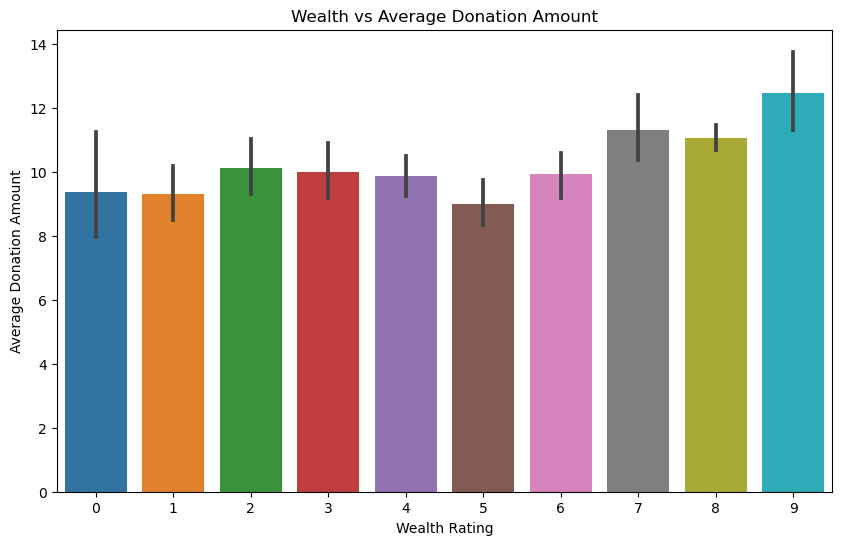

In [13]:
visualization(cdf, x_column='Wealth_Rating', y_column='Average_Donation_Amount', plot_type='bar',
              title='Wealth vs Average Donation Amount', x_label='Wealth Rating', y_label='Average Donation Amount',
              hue_column=None)

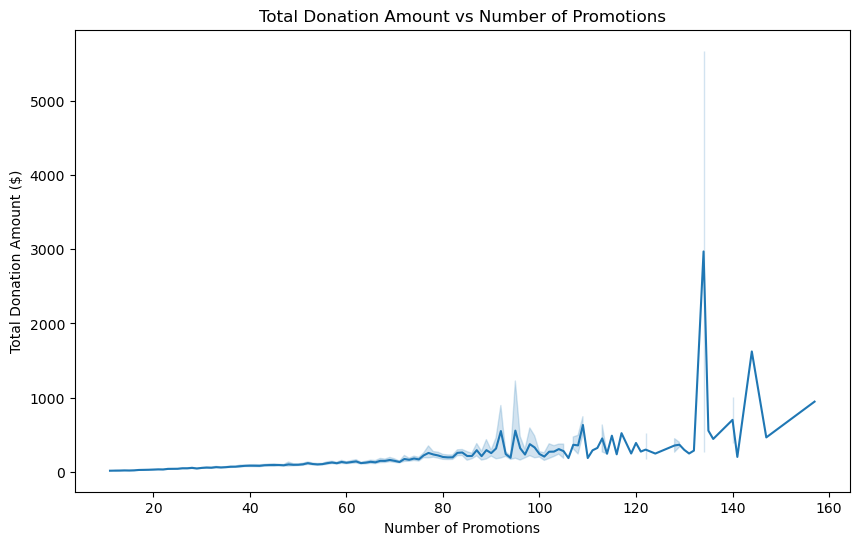

In [14]:
visualization(cdf, x_column='Number_of_Promotions', y_column='Total_Donation_Amount',
               plot_type='line', title="Total Donation Amount vs Number of Promotions",
               x_label="Number of Promotions", y_label="Total Donation Amount ($)")

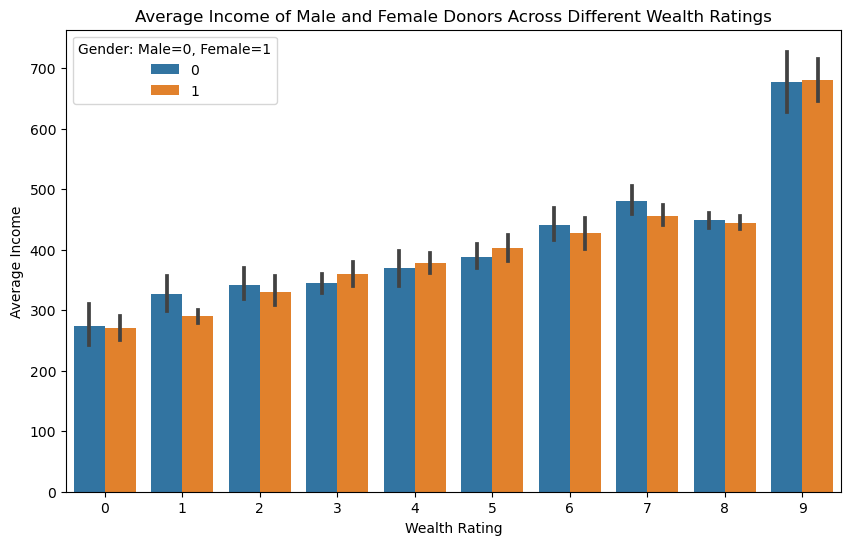

In [15]:
visualization(cdf, x_column='Wealth_Rating', y_column='Average_Income', hue_column='Gender',
               plot_type='bar', title='Average Income of Male and Female Donors Across Different Wealth Ratings',
               x_label='Wealth Rating', y_label='Average Income', legend_title='Gender: Male=0, Female=1')